# Querying NEXUS

In this notebook we will demonstrate a simple use case of using queried NEXUS data to download files from XNAT.

XNAT Instance: https://xnat-curate.ae.mpg.de

XNAT Projects loaded: "NEXUS ECOG, NEXUS FMRI, NEXUS ECOG"

Steps:
1. Load data from xnat -> postgres -> nexus
2. Pick a simple query based on existing forms
3. Construct the query, and run it
4. Expose the result for further use.

# Some target queries

## Query 1
- "Gender" Male
- "Primary Language" Afrikaans
- "analysis_step" contains "synchrony"
- "Musical Training" yes
- "scan" FingerLoc

Query 1 output parameters required
- project, subject, session 

expected: nexus2, NB002, NB002_ECOG_1

## Query 2
- "manufacturer" EYELINK 
- "Psychiatric History" contains depression
- "Eye Dominance" Right

Query 2 output parameters required
- project, subject, session, scans

expected: nexus2, NB002, NB002_ET_1

## Query 3
- "Powerline Frequency" 50
- "Race" Asian
- "Eye Dominance" Right
- "Institute" University of Birmingham

Query 3 output parameters required
- project, subject, session

expected: nexus1, NA002, NA002_MEEG_1

## Query 4
- "Device Types" Type intercranial_sensor
- "Stimuli" VisualStims
- "Responses" contains ButtonPress

Query 4 output parameters required
- list of projects, subjects

expected: nexus1, nexus2, NA001, NA002, NB001, NB002

In [46]:
import os.path as op
import xnat
import requests
import mne

mne.set_log_level('ERROR')

In [62]:
%matplotlib inline

NEXUS query stuff go here.. 

In [31]:
# Expected results of Query 3 - nexus1, NA002, NA002_MEEG_1

project_name = "nexus1"
subject_name = "NA002"
session_name = "NA002_MEEG_1"
scan_name = "RestingEO"
download_dir = "/Users/praveen.sripad/Downloads/2023-08-10_eln_demo"

In [32]:
# start connection to XNAT
xnat_host = 'xnat-curate'
with xnat.connect('https://%s.ae.mpg.de' % xnat_host,
                  netrc_file=op.join(op.expanduser('~'), '.%s_netrc' %
                  xnat_host.replace('-', '_')), loglevel='ERROR') as connection:
    # download the data
    connection.projects[project_name].subjects[subject_name].experiments[session_name].scans[scan_name].download_dir(download_dir)

 40.3 MiB |                                                   #   |   7.9 MiB/s


In [33]:
downloaded_file = op.join(download_dir, 
                          "NA002_MEEG_1/scans/RestingEO-RestingEO/resources/FIF/files/NA002_MEEG_V1_RestingEO.fif")
assert op.isfile(downloaded_file), 'File not available.'

# Load and use the downloaded data

In [40]:
raw = mne.io.Raw(downloaded_file, preload=True)

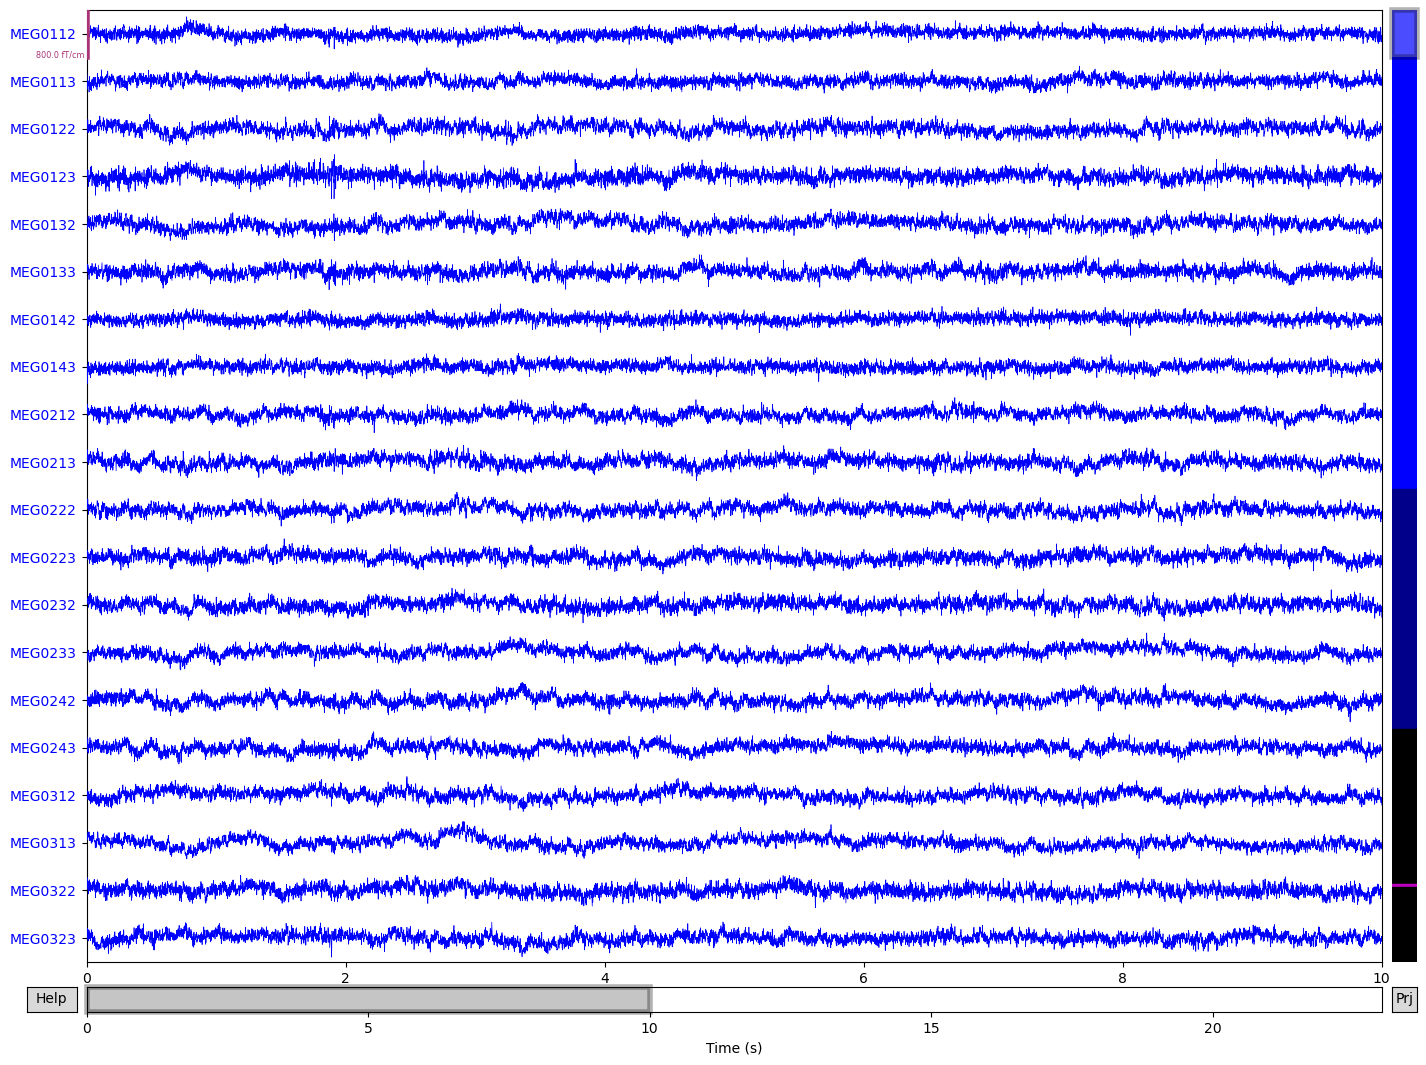

In [41]:
raw.plot();

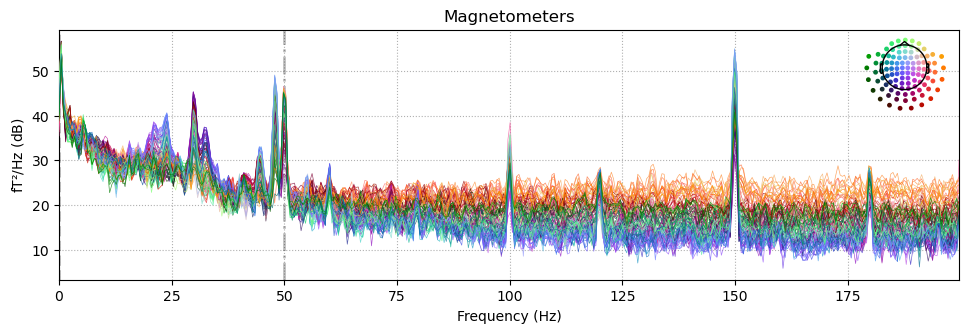

In [67]:
raw.compute_psd(fmin=0., fmax=200., picks=['mag']).plot(show=False);

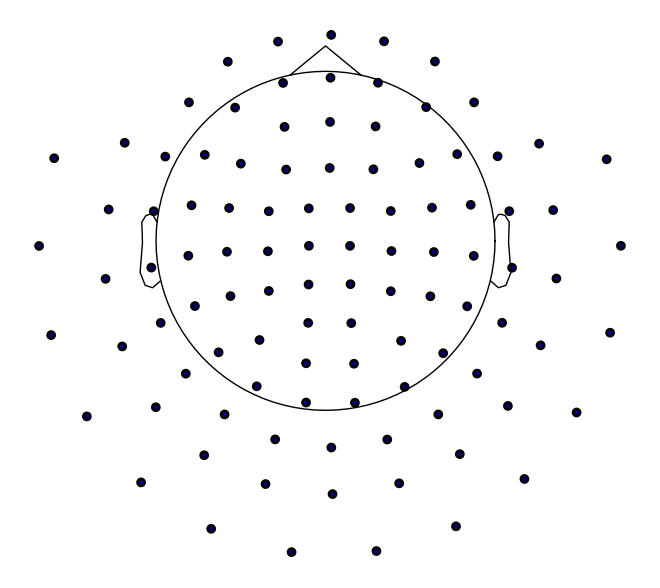

In [70]:
raw.plot_sensors(kind='topomap', ch_type='mag');

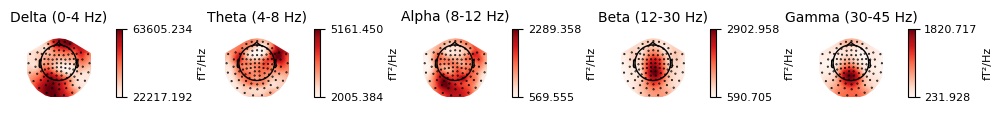

In [56]:
raw.plot_psd_topomap();

do further analysis... 

END.